In [1]:
def step_function(x):
    y = x > 0 
    return y.astype(np.int)
#     else:
#         return 0

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# 계단함수

In [3]:
x= np.array([-1,1-3,2])

In [4]:
x

array([-1, -2,  2])

In [5]:
y= x>0
y

array([False, False,  True], dtype=bool)

In [6]:
y = y.astype(np.int)

In [7]:
y

array([0, 0, 1])

In [8]:
def step_function(x):
    return np.array(x > 0 , dtype = np.int)

In [9]:
x = np.arange(-5,5,0.1)
y = step_function(x)

(-0.1, 1.1)

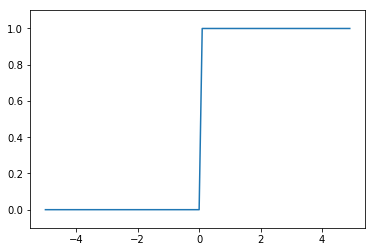

In [10]:
plt.plot(x,y)
plt.ylim(-0.1,1.1)

# 시그모이드

In [11]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [12]:
x = np.array([-1,1,2]) #numpy broadcast 기능

In [13]:
sigmoid(x)

array([ 0.26894142,  0.73105858,  0.88079708])

In [14]:
#브로드케스트 연습
t = np.array([1,2,3])
t+1
t/2

array([ 0.5,  1. ,  1.5])

In [15]:
x = np.arange(-5,5,0.1)
y = sigmoid(x)

(-0.1, 1.1)

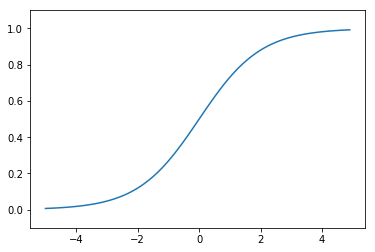

In [16]:
plt.plot(x,y)
plt.ylim(-0.1,1.1)

# ReLU
입력이 0을 넘으면 그 입력을 그대로 출력하고, 0 이하이면 0을 출력하는 활성화 함수

In [17]:
def relu(x):
    return np.maximum(0,x)

# 다차원배열 + 행렬 + 내적(행렬곱)

In [18]:
A = np.array([1,2,3,4])

In [19]:
A[0:2]

array([1, 2])

In [20]:
B = np.array([[1,2],[3,4],[5,6]])

In [21]:
B.shape[0]

3

In [22]:
A = np.array([[1,2],[3,4],[5,6]])

In [23]:
B = np.array([7,8])

In [24]:
np.dot(A,B)

array([23, 53, 83])

# 신경망 내적

In [46]:
X = np.array([1,2]) # input data

In [47]:
X.shape

(2,)

In [48]:
W = np.array([[1,3,5],[2,4,6]]) #weight data

In [49]:
W.shape

(2, 3)

In [50]:
Y = np.dot(X,W) #first output in second node 

In [51]:
print(Y)

[ 5 11 17]


# 3층 신경망 구현하기

In [57]:
X = np.array([1,0.5])
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
B1 = np.array([0.1,0.2,0.3])

In [53]:
print(W1.shape)
print(X.shape)
print(B1.shape)

(2, 3)
(2,)
(3,)


In [56]:
A1 = np.dot(X,W1)
A1

array([ 0.2,  0.5,  0.8])

In [58]:
A1 = A1+B1

In [59]:
A1 #a1,a2,a3로 결합만 된 상태

array([ 0.3,  0.7,  1.1])

In [60]:
Z1 = sigmoid(A1) #결합함수로 결합된 값을 시그모이드 함수로 활성화 - > 출력

In [61]:
print(A1)
print(Z1)

[ 0.3  0.7  1.1]
[ 0.57444252  0.66818777  0.75026011]


In [62]:
W2 = np.array([[0.1,0.4],[0.2,0.5],[0.3,0.6]])
B2 = np.array([0.1,0.2])

In [63]:
A2 = np.dot(Z1,W2) + B2 #Z1이 새로운 입력값으로!

In [64]:
Z2 = sigmoid(A2)

In [65]:
Z2

array([ 0.62624937,  0.7710107 ])

In [66]:
def identitiy_function(x):
    return x

In [67]:
W3 = np.array([[0.1,0.3],[0.2,0.4]])
B3 = np.array([0.1,0.2])

In [68]:
A3 = np.dot(Z2,W3) + B3

In [69]:
Y = identitiy_function(A3)

In [70]:
Y

array([ 0.31682708,  0.69627909])

# Softmax function
1.은닉층에서 출력층으로 값을 보낼 때 역시 활성함수가 사용된다.

2.회귀에서는 항등함수, binary 분류에서는 sigmoid, 3개 이상의 분류에서는 softmax function이 사용된다.

3.softmax 함수의 특징은 출력 총합이 1이 된다는 점이다. 때문에 소프트맥스 함수의 출력을 '확률'로 해석할 수 있다.

4.softmax 함수에는 지수함수(expoenetial function)가 쓰이는데, 지수함수는 단조 증가함수이다. (if a<b , f(a)<f(b))

때문에 각 원소의 대소관계는 변하지 않는다. 현업 분류문제에서 결과를 추론할 때 소프트맥스 함수를 빼고 결과를 도출하기도 한다.

In [71]:
a = np.array([0.3,2.9,4.0])

In [72]:
exp_a = np.exp(a)
exp_a

array([  1.34985881,  18.17414537,  54.59815003])

In [73]:
sum_exp_a= np.sum(exp_a)
sum_exp_a

74.122154210163302

In [74]:
y = exp_a/sum_exp_a
#exp_a[0]/sum_exp_a
#exp_a[1]/sum_exp_a
#exp_a[2]/sum_exp_a
#numpy broadcasting

In [75]:
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [76]:
exp_a[0]/sum_exp_a

0.018211273295547534

In [77]:
def softmax(a):
    c = np.max(a)
    exp_a = np.exp(a-c)
    sum_exp_a = np.sum(exp_a)
    
    return exp_a / sum_exp_a

In [78]:
softmax(np.arange(1,10,2))

array([  2.90075868e-04,   2.14338686e-03,   1.58376057e-02,
         1.17024957e-01,   8.64703974e-01])

In [79]:
np.arange(1,10,2)

array([1, 3, 5, 7, 9])

In [80]:
a = np.array([1011,1000,900])

In [81]:
np.exp(a)/np.sum(np.exp(a))

C:\Users\BonGgu\Miniconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: overflow encountered in exp
  """Entry point for launching an IPython kernel.
C:\Users\BonGgu\Miniconda3\envs\data_science\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


array([ nan,  nan,  nan])

In [82]:
c = np.max(a)

In [83]:
a-c

array([   0,  -11, -111])

In [84]:
np.exp(a-c)/np.sum(np.exp(a-c))

array([  9.99983299e-01,   1.67014218e-05,   6.21305582e-49])

In [85]:
softmax(a)

array([  9.99983299e-01,   1.67014218e-05,   6.21305582e-49])

In [86]:
a = np.arange(1,10,0.2)

In [87]:
y = softmax(a)
y

array([  2.73266434e-05,   3.33768376e-05,   4.07665615e-05,
         4.97923907e-05,   6.08165633e-05,   7.42815181e-05,
         9.07276511e-05,   1.10815003e-04,   1.35349751e-04,
         1.65316559e-04,   2.01918101e-04,   2.46623325e-04,
         3.01226410e-04,   3.67918768e-04,   4.49376998e-04,
         5.48870305e-04,   6.70391704e-04,   8.18818276e-04,
         1.00010690e-03,   1.22153333e-03,   1.49198418e-03,
         1.82231359e-03,   2.22577884e-03,   2.71857242e-03,
         3.32047185e-03,   4.05563347e-03,   4.95356191e-03,
         6.05029418e-03,   7.38984600e-03,   9.02597828e-03,
         1.10243548e-02,   1.34651773e-02,   1.64464047e-02,
         2.00876841e-02,   2.45351528e-02,   2.99673032e-02,
         3.66021468e-02,   4.47059631e-02,   5.46039866e-02,
         6.66934599e-02,   8.14595759e-02,   9.94949506e-02,
         1.21523407e-01,   1.48429025e-01,   1.81291620e-01])

In [88]:
np.sum(y)

1.0000000000000002


# MNIST

기계학습분야의 유명한 데이터 셋이다. 간단한 실험부터 논문으로 발표되는 연구까지 다양한 곳에서 이용되고 있다. 

이미지 인식이나 기계학습 논문들을 읽다 보면 실험용 데이터로 자주 등장한다. 

In [89]:
import sys, os
from mnist import load_mnist

In [90]:
(x_train, t_train),(x_test,t_test) = load_mnist(flatten = True, normalize = False)

In [91]:
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [94]:
import Image

ModuleNotFoundError: No module named 'Image'